In [1]:
# p43 (p64 PDF) 

%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

c:\Users\duyni\Documents\Learn-Quantum-Computing-with-Python-and-IBM-Quantum-Experience\quantum_env\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Chapter 13 - Quantum Algorithms

In [2]:
# p367 (p388 PDF) 

# Helper function to execute circuits
from qiskit.providers.ibmq import least_busy

# qc = QuantumCircuit to execute, 
# simulator = boolean, if True then run on qasm simulator, else run on the least busy quantum system
def execute_circuit(qc, simulator):
    if(simulator):
        backend = Aer.get_backend('qasm_simulator')
    else:
        backend = provider.backends(filters=lambda x: x.configuration().n_qubits > 2
                                   and not x.configuration().simulator)
    result = execute(qc, backend, shots=1024).result()
    return result


In [3]:
# p368 (p389 PDF) 

# State 1: 
state1 = QuantumCircuit(2)
# Initialize input to |0,0>
state1.barrier()


In [4]:
# p368 (p389 PDF) 

# Prepare the Bell state
state1.h(0)


In [5]:
# p368 (p389 PDF) 

state1.cx(0,1)

In [6]:
# p368 (p389 PDF) 

state1.measure_all()
state1.draw()


░ ┌───┐      ░ ┌─┐   
   q_0: ─░─┤ H ├──■───░─┤M├───
         ░ └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─░──────┤ X ├─░──╫─┤M├
         ░      └───┘ ░  ║ └╥┘
meas: 2/═════════════════╩══╩═
                         0  1

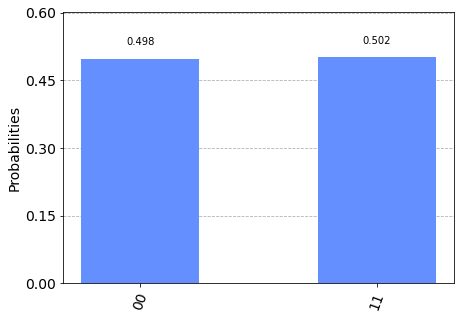

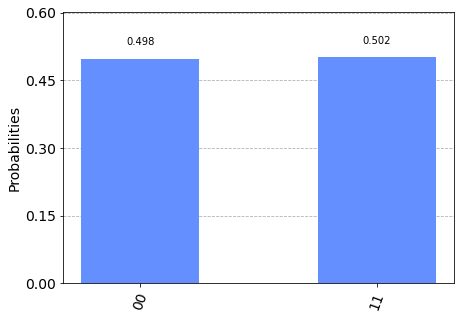

In [7]:
# p369 (p390 PDF) 

# Execute the Bell state 
result = execute_circuit(state1, True)
plot_histogram(result.get_counts(state1))


In [8]:
# p369 (p390 PDF) 

# State 2: 
state2 = QuantumCircuit(2)

# Initialize input state to |1,0>
state2.x(1)
state2.barrier()


In [9]:
# p370 (p391 PDF) 

# Prepare the Bell state
state2.h(0)
state2.cx(0,1)
state2.measure_all()
state2.draw()


░ ┌───┐      ░ ┌─┐   
   q_0: ──────░─┤ H ├──■───░─┤M├───
        ┌───┐ ░ └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ┤ X ├─░──────┤ X ├─░──╫─┤M├
        └───┘ ░      └───┘ ░  ║ └╥┘
meas: 2/══════════════════════╩══╩═
                              0  1

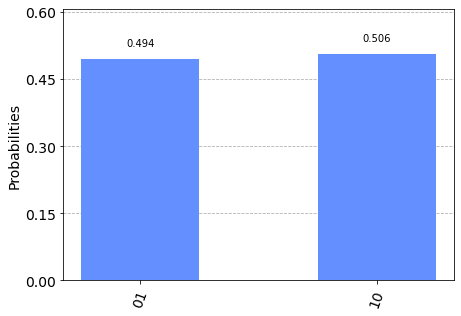

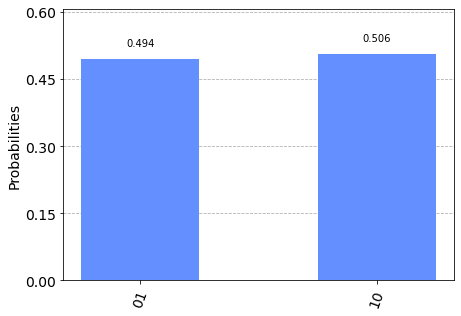

In [10]:
# p370 (p391 PDF) 

# Execute the Bell state |PHI+>
result = execute_circuit(state2, True)
plot_histogram(result.get_counts(state2))


In [11]:
# p375 (p396 PDF) 

# Implement Deutsch's algorithm for a balanced function
qc = QuantumCircuit(2,1)

# Prepare the input qubits, where q0=0, q1=1
print('Step 1: Prepare the input qubits, where q0=0, q1=1')
qc.i(0)
qc.x(1)
qc.barrier()
qc.draw()


Step 1: Prepare the input qubits, where q0=0, q1=1


┌───┐ ░ 
q_0: ┤ I ├─░─
     ├───┤ ░ 
q_1: ┤ X ├─░─
     └───┘ ░ 
c: 1/════════

In [12]:
# p376 (p397 PDF) 

# Place each qubit in superposition by applying a Hadamard
print('Step 2: Place each qubit in superposition by applying a Hadamard')
qc.h(0)
qc.h(1)
qc.barrier()
qc.draw()


Step 2: Place each qubit in superposition by applying a Hadamard


┌───┐ ░ ┌───┐ ░ 
q_0: ┤ I ├─░─┤ H ├─░─
     ├───┤ ░ ├───┤ ░ 
q_1: ┤ X ├─░─┤ H ├─░─
     └───┘ ░ └───┘ ░ 
c: 1/════════════════

In [13]:
# p378 (p399 PDF) 

# Add a CNOT gate with the Control on q0 and Target on q1
qc.cx(0,1)
# Draw the circuit
qc.draw()


┌───┐ ░ ┌───┐ ░      
q_0: ┤ I ├─░─┤ H ├─░───■──
     ├───┤ ░ ├───┤ ░ ┌─┴─┐
q_1: ┤ X ├─░─┤ H ├─░─┤ X ├
     └───┘ ░ └───┘ ░ └───┘
c: 1/═════════════════════

In [14]:
# p379 (p400 PDF) 

# Add the Hadamard gates to all qubits
qc.h(0)
qc.h(1)
qc.barrier()
qc.draw()

┌───┐ ░ ┌───┐ ░      ┌───┐ ░ 
q_0: ┤ I ├─░─┤ H ├─░───■──┤ H ├─░─
     ├───┤ ░ ├───┤ ░ ┌─┴─┐├───┤ ░ 
q_1: ┤ X ├─░─┤ H ├─░─┤ X ├┤ H ├─░─
     └───┘ ░ └───┘ ░ └───┘└───┘ ░ 
c: 1/═════════════════════════════

In [15]:
# p380 (p401 PDF) 

# Add measurement operator to the first qubit
qc.measure(0,0)
qc.draw()

┌───┐ ░ ┌───┐ ░      ┌───┐ ░ ┌─┐
q_0: ┤ I ├─░─┤ H ├─░───■──┤ H ├─░─┤M├
     ├───┤ ░ ├───┤ ░ ┌─┴─┐├───┤ ░ └╥┘
q_1: ┤ X ├─░─┤ H ├─░─┤ X ├┤ H ├─░──╫─
     └───┘ ░ └───┘ ░ └───┘└───┘ ░  ║ 
c: 1/══════════════════════════════╩═
                                   0

Step 6: Execute the quantum circuit to view results.
{'1': 1024}


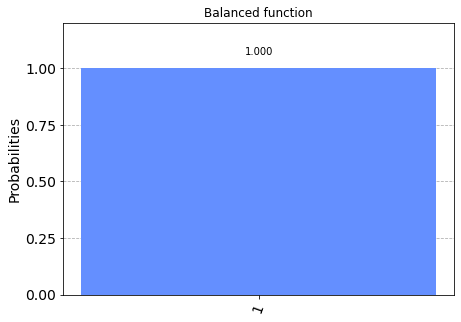

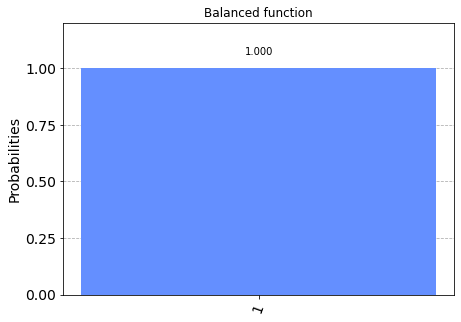

In [16]:
# p381 (p402 PDF) 

# Execute the quantum circuit on the simulator first to confirm our results.
print('Step 6: Execute the quantum circuit to view results.')
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=backend, shots=1024).result()
counts = result.get_counts(qc)

# Print and plot our results
print(counts)
plot_histogram(counts, title='Balanced function')


In [17]:
# p382 (p403 PDF) 

#Import the least_busy module and enable Qiskit job watcher
from qiskit.providers.ibmq import least_busy
%qiskit_job_watcher

#Identify the least busy devices 
backend_devices = provider.backends(filters=lambda x: x.configuration().n_qubits > 2
                                   and not x.configuration().simulator)
# Assign least busy device to backend
backend = least_busy(backend_devices)

#Print the least busy device
print('The least busy device: {}'.format(least_busy(backend_devices)))


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

The least busy device: ibmq_quito


In [18]:
# p382 (p403 PDF) 

# Execute the previous constant circuit on a quantum device
result = execute(qc, backend=backend, shots=1024).result()
counts = result.get_counts(qc)
# Print and plot results
print(counts)
plot_histogram(counts, title='Balanced function')


KeyboardInterrupt: 

In [19]:
# p386 (p407 PDF) 

# Create the quantum circuit with both input registers X, and y
input_qubits = 4  # Refers to our X input register, 4-qubits
ancilla_qubit = 1 # Refers to our y input register, 1-qubit

# Total qubits in our quantum circuit
total_qubits = input_qubits + ancilla_qubit

# Generate the circuit
qc = QuantumCircuit(total_qubits, input_qubits)
# Set the X qubits in superposition
for idx in range(input_qubits):
    qc.h(idx)
    
# Set the y qubit to 1, then apply a Hadamard
qc.x(input_qubits)
qc.h(input_qubits)

qc.barrier()
qc.draw()


┌───┐      ░ 
q_0: ┤ H ├──────░─
     ├───┤      ░ 
q_1: ┤ H ├──────░─
     ├───┤      ░ 
q_2: ┤ H ├──────░─
     ├───┤      ░ 
q_3: ┤ H ├──────░─
     ├───┤┌───┐ ░ 
q_4: ┤ X ├┤ H ├─░─
     └───┘└───┘ ░ 
c: 4/═════════════

In [20]:
# p388 (p409 PDF) 

# Set the bit string which we wish to evaluate, in this case lets set '1010', where I indicates value 0, and x indicates value 1.
qc.i(0)
qc.x(1)
qc.i(2)
qc.x(3)

qc.barrier()
qc.draw()


┌───┐      ░ ┌───┐ ░ 
q_0: ┤ H ├──────░─┤ I ├─░─
     ├───┤      ░ ├───┤ ░ 
q_1: ┤ H ├──────░─┤ X ├─░─
     ├───┤      ░ ├───┤ ░ 
q_2: ┤ H ├──────░─┤ I ├─░─
     ├───┤      ░ ├───┤ ░ 
q_3: ┤ H ├──────░─┤ X ├─░─
     ├───┤┌───┐ ░ └───┘ ░ 
q_4: ┤ X ├┤ H ├─░───────░─
     └───┘└───┘ ░       ░ 
c: 4/═════════════════════

In [21]:
# p388 (p409 PDF) 

# Set oracle to either constant (output = 0s) 
# or balanced (output = 1s)

# In this example we will choose a balanced function 
for idx in range(input_qubits):
    qc.cx(idx, input_qubits)

qc.barrier()
qc.draw()


┌───┐      ░ ┌───┐ ░                      ░ 
q_0: ┤ H ├──────░─┤ I ├─░───■──────────────────░─
     ├───┤      ░ ├───┤ ░   │                  ░ 
q_1: ┤ H ├──────░─┤ X ├─░───┼────■─────────────░─
     ├───┤      ░ ├───┤ ░   │    │             ░ 
q_2: ┤ H ├──────░─┤ I ├─░───┼────┼────■────────░─
     ├───┤      ░ ├───┤ ░   │    │    │        ░ 
q_3: ┤ H ├──────░─┤ X ├─░───┼────┼────┼────■───░─
     ├───┤┌───┐ ░ └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
q_4: ┤ X ├┤ H ├─░───────░─┤ X ├┤ X ├┤ X ├┤ X ├─░─
     └───┘└───┘ ░       ░ └───┘└───┘└───┘└───┘ ░ 
c: 4/════════════════════════════════════════════

In [22]:
# p389 (p410 PDF) 

# Set the closing bit string we selected earlier to evaluate
qc.i(0)
qc.x(1)
qc.i(2)
qc.x(3)

qc.barrier()
qc.draw()


┌───┐      ░ ┌───┐ ░                      ░ ┌───┐ ░ 
q_0: ┤ H ├──────░─┤ I ├─░───■──────────────────░─┤ I ├─░─
     ├───┤      ░ ├───┤ ░   │                  ░ ├───┤ ░ 
q_1: ┤ H ├──────░─┤ X ├─░───┼────■─────────────░─┤ X ├─░─
     ├───┤      ░ ├───┤ ░   │    │             ░ ├───┤ ░ 
q_2: ┤ H ├──────░─┤ I ├─░───┼────┼────■────────░─┤ I ├─░─
     ├───┤      ░ ├───┤ ░   │    │    │        ░ ├───┤ ░ 
q_3: ┤ H ├──────░─┤ X ├─░───┼────┼────┼────■───░─┤ X ├─░─
     ├───┤┌───┐ ░ └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░ 
q_4: ┤ X ├┤ H ├─░───────░─┤ X ├┤ X ├┤ X ├┤ X ├─░───────░─
     └───┘└───┘ ░       ░ └───┘└───┘└───┘└───┘ ░       ░ 
c: 4/════════════════════════════════════════════════════

In [23]:
# p390 (p411 PDF) 

# Add the Hadamard gates to complete wrapping the oracle
for idx in range(4):
    qc.h(idx)

qc.barrier()
qc.draw()


┌───┐      ░ ┌───┐ ░                      ░ ┌───┐ ░ ┌───┐ ░ 
q_0: ┤ H ├──────░─┤ I ├─░───■──────────────────░─┤ I ├─░─┤ H ├─░─
     ├───┤      ░ ├───┤ ░   │                  ░ ├───┤ ░ ├───┤ ░ 
q_1: ┤ H ├──────░─┤ X ├─░───┼────■─────────────░─┤ X ├─░─┤ H ├─░─
     ├───┤      ░ ├───┤ ░   │    │             ░ ├───┤ ░ ├───┤ ░ 
q_2: ┤ H ├──────░─┤ I ├─░───┼────┼────■────────░─┤ I ├─░─┤ H ├─░─
     ├───┤      ░ ├───┤ ░   │    │    │        ░ ├───┤ ░ ├───┤ ░ 
q_3: ┤ H ├──────░─┤ X ├─░───┼────┼────┼────■───░─┤ X ├─░─┤ H ├─░─
     ├───┤┌───┐ ░ └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░ └───┘ ░ 
q_4: ┤ X ├┤ H ├─░───────░─┤ X ├┤ X ├┤ X ├┤ X ├─░───────░───────░─
     └───┘└───┘ ░       ░ └───┘└───┘└───┘└───┘ ░       ░       ░ 
c: 4/════════════════════════════════════════════════════════════

In [24]:
# p391 (p412 PDF) 

# Add measurements only to our inputs
qc.measure(range(4),range(4))

# Draw the circuit
qc.draw()


┌───┐      ░ ┌───┐ ░                      ░ ┌───┐ ░ ┌───┐ ░ ┌─┐         
q_0: ┤ H ├──────░─┤ I ├─░───■──────────────────░─┤ I ├─░─┤ H ├─░─┤M├─────────
     ├───┤      ░ ├───┤ ░   │                  ░ ├───┤ ░ ├───┤ ░ └╥┘┌─┐      
q_1: ┤ H ├──────░─┤ X ├─░───┼────■─────────────░─┤ X ├─░─┤ H ├─░──╫─┤M├──────
     ├───┤      ░ ├───┤ ░   │    │             ░ ├───┤ ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├──────░─┤ I ├─░───┼────┼────■────────░─┤ I ├─░─┤ H ├─░──╫──╫─┤M├───
     ├───┤      ░ ├───┤ ░   │    │    │        ░ ├───┤ ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├──────░─┤ X ├─░───┼────┼────┼────■───░─┤ X ├─░─┤ H ├─░──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├─░───────░─┤ X ├┤ X ├┤ X ├┤ X ├─░───────░───────░──╫──╫──╫──╫─
     └───┘└───┘ ░       ░ └───┘└───┘└───┘└───┘ ░       ░       ░  ║  ║  ║  ║ 
c: 4/═════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                  0  1  2  3

{'1111': 1024}


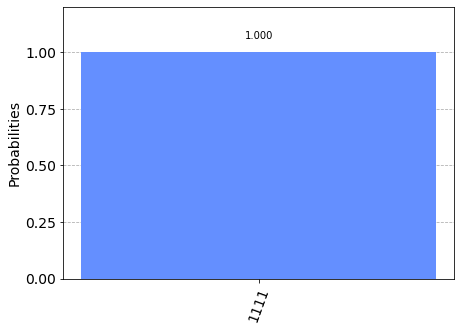

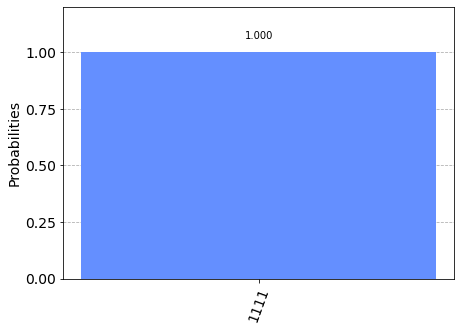

In [25]:
# p391 (p412 PDF) 

# Execute the circuit
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=backend, shots=1024).result()
counts = result.get_counts(qc)

# Print and plot results
print(counts)
plot_histogram(counts)


In [26]:
# p392 (p413 PDF) 

#Enable the job watcher widget
%qiskit_job_watcher

# Print all backends with at least 5 or more qubits
provider.backends(filters=lambda x: x.configuration().n_qubits >= total_qubits and not x.configuration().simulator and x.status().operational==True)


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

[<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [27]:
# p393 (p414 PDF) 

# Select any of the avialable backends above you have listed, 
# In this case we will pick 'ibmq_ourense'
backend = provider.get_backend('ibmq_ourense')

# Execute the previous circuit on a quantum device
result = execute(qc, backend=backend, shots=1024).result()
counts = result.get_counts(qc)

# Print and plot results
print(counts)
plot_histogram(counts)


QiskitBackendNotFoundError: 'No backend matches the criteria'

In [28]:
# p397 (p418 PDF) 

# Create your secret number
shh = '1010'

# Set the number of qubits to represent secret number and an ancilla qubit
input_qubits = len(shh)
ancilla_qubit = 1
total_qubits = input_qubits + ancilla_qubit

# Create the quantum circuit
qc = QuantumCircuit(total_qubits, input_qubits)


In [29]:
# p397 (p418 PDF) 

# Add Hadamard gates to the input qubits
for idx in range(input_qubits):
    qc.h(idx)

# Draw the input circuit
qc.draw()


┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     └───┘
q_4: ─────
          
c: 4/═════

In [30]:
# p398 (p419 PDF) 

# Prepare the ancilla qubit of the circuit
qc.x(total_qubits-1)
qc.h(total_qubits-1)

qc.barrier()
  
# Draw the prepared circuit
qc.draw()


┌───┐      ░ 
q_0: ┤ H ├──────░─
     ├───┤      ░ 
q_1: ┤ H ├──────░─
     ├───┤      ░ 
q_2: ┤ H ├──────░─
     ├───┤      ░ 
q_3: ┤ H ├──────░─
     ├───┤┌───┐ ░ 
q_4: ┤ X ├┤ H ├─░─
     └───┘└───┘ ░ 
c: 4/═════════════

In [31]:
# p399 (p420 PDF) 

# Before creating the oracle, we need to adjust the qubits 
# Since they are ordered from left to right, we will reverse the secret number

# Current secret value
print('Secret before reverse: ', shh)

# Reverse order
shh = shh[::-1]
print('Secret after reverse: ', shh)


Secret before reverse:  1010
Secret after reverse:  0101


In [32]:
# p400 (p421 PDF) 

# Now that we have the right order, let's create the oracle
# by applying a CNOT, where the qubits set to '1' are the source
# and the targe would be the ancilla qubit
for idx in range(input_qubits):
    if shh[idx] == '1':
        qc.cx(idx, input_qubits)

qc.barrier()
qc.draw()


┌───┐      ░            ░ 
q_0: ┤ H ├──────░────────────░─
     ├───┤      ░            ░ 
q_1: ┤ H ├──────░───■────────░─
     ├───┤      ░   │        ░ 
q_2: ┤ H ├──────░───┼────────░─
     ├───┤      ░   │        ░ 
q_3: ┤ H ├──────░───┼────■───░─
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ 
q_4: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░─
     └───┘└───┘ ░ └───┘└───┘ ░ 
c: 4/══════════════════════════

In [33]:
# p401 (p422 PDF) 


# Now let's close up our circuit with Hadamards applied to the input qubits
for idx in range(input_qubits):
    qc.h(idx)

qc.barrier()

# Finally, let's add measurements to our input qubits
qc.measure(range(input_qubits), range(input_qubits))

qc.draw()


┌───┐      ░            ░ ┌───┐ ░ ┌─┐         
q_0: ┤ H ├──────░────────────░─┤ H ├─░─┤M├─────────
     ├───┤      ░            ░ ├───┤ ░ └╥┘┌─┐      
q_1: ┤ H ├──────░───■────────░─┤ H ├─░──╫─┤M├──────
     ├───┤      ░   │        ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├──────░───┼────────░─┤ H ├─░──╫──╫─┤M├───
     ├───┤      ░   │        ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├──────░───┼────■───░─┤ H ├─░──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────░──╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ░  ║  ║  ║  ║ 
c: 4/═══════════════════════════════════╩══╩══╩══╩═
                                        0  1  2  3

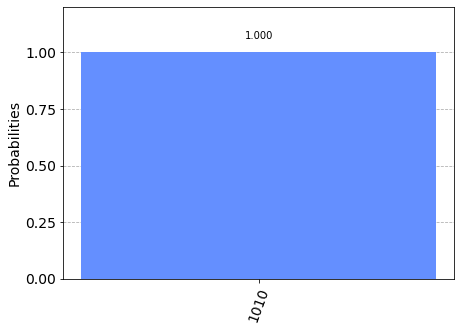

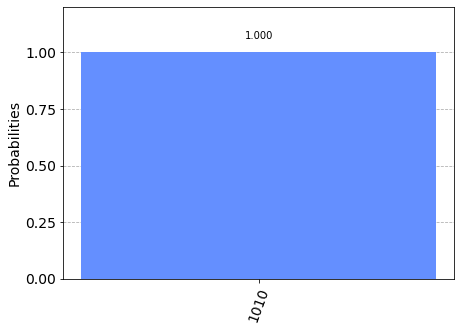

In [34]:
# p402 (p423 PDF) 

# Execute the circuit and plot the results
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts = result.get_counts(qc)
plot_histogram(counts)


In [35]:
# p403 (p424 PDF) 

#Enable the job watcher widget
%qiskit_job_watcher

# Print all backends with at least 5 or more qubits
provider.backends(filters=lambda x: x.configuration().n_qubits >= 5 and not x.configuration().simulator and x.status().operational==True)


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

[<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [36]:
# p404 (p425 PDF) 

# Choose whichever backend you wish from the list, 
# For this example, we will use 'ibmq_ourense'
backend = provider.get_backend('ibmq_ourense')

# Execute the previous circuit on a quantum device
result = execute(qc, backend=backend, shots=1024).result()
counts = result.get_counts(qc)

# Print and plot results
print(counts)
plot_histogram(counts)


QiskitBackendNotFoundError: 'No backend matches the criteria'

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table